In [1]:
from qutip import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from qutip.ipynbtools import plot_animation

In [2]:
psi0 = tensor(basis(2, 0), basis(3, 0), basis(2, 0))
rho0 = psi0 * psi0.dag()
rho0

Quantum object: dims=[[2, 3, 2], [2, 3, 2]], shape=(12, 12), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [3]:
# Constants
omega_L = 2*np.pi*1.07e6 # 13C Larmor
A_parallel = 204.9e3 # electron-13C hyperfine coupling
A_perp = 123.3e3 # electron-13C hyperfine coupling
h_bar = 1  # eV/Hz
rabi = 2*np.pi*10e6 # electron Rabi drive
delta = 2*np.pi*1e6 # electron drive detuning

omega_L_N = 2 * np.pi * 0.3e6      # 14N Larmor
A_parallel_N = 2.14e6      # electron-14N hyperfine coupling
A_perp_N = 2.7e6   # electron-14N hyperfine coupling

In [51]:
# Define identity operators
I2 = qeye(2)  # identity for spin-½
I3 = qeye(3)  # identity for spin-1

num_carbons = 1

# initial state
psi0 = tensor(basis(2, 0), basis(3, 0))
for i in range(num_carbons):
    psi0 = tensor(psi0, basis(2, 0))
rho0 = psi0 * psi0.dag()
rho0

# Spin-½ operators (on qubit 0)
sx0 = tensor(sigmax(), I3)      # σx ⊗ I
sz0 = tensor(sigmaz(), I3)      # σz ⊗ I


# Spin-1 operators (on qubit 1)
# jmat(S, 'x') gives spin-x for spin-S
sx1 = tensor(I2, jmat(1, 'x'))  # I ⊗ Sx
sz1 = tensor(I2, jmat(1, 'z'))  # I ⊗ Sz

# add C13 to electron/nitrogen operators
for i in range(num_carbons):
    sx0 = tensor(sx0, I2)
    sz0 = tensor(sz0, I2)
    sx1 = tensor(sx1, I2)
    sz1 = tensor(sz1, I2)

sx2 = tensor(I2, I3, sigmax())
sz2 = tensor(I2, I3, sigmaz())

sx_carbons = []
sz_carbons = []

for i in range(num_carbons):
    sx_carbons.append(tensor(I2, I3))
    sz_carbons.append(tensor(I2, I3))
    for j in range(num_carbons):
        if (i == j):
            sx_carbons[i] = tensor(sx_carbons[i], sigmax())
            sz_carbons[i] = tensor(sz_carbons[i], sigmaz())
        else:
            sx_carbons[i] = tensor(sx_carbons[i], I2)
            sz_carbons[i] = tensor(sz_carbons[i], I2)

# Build the Hamiltonian (with 10 C13)
H = (
    (delta / 2) * sz0
    + (rabi / 2) * sx0
    + omega_L_N * sz1
    + A_parallel_N * sz0 * sz1
    + A_perp_N * sz0 * sx1
    + omega_L * sz_carbons[0]
    + A_parallel * sz0 * sz_carbons[0]
    + A_perp * sz0 * sx_carbons[0]
)

H_tau = (
    (delta / 2) * sz0
    + omega_L_N * sz1
    + A_parallel_N * sz0 * sz1
    + A_perp_N * sz0 * sx1
    + omega_L * sz_carbons[0]
    + A_parallel * sz0 * sz_carbons[0]
    + A_perp * sz0 * sx_carbons[0]
)

In [52]:
H

Quantum object: dims=[[2, 3, 2], [2, 3, 2]], shape=(12, 12), type='oper', dtype=CSR, isherm=True
Qobj data =
[[11952863.87083603   123300.          1909188.30920368        0.
         0.                0.         31415926.53589793        0.
         0.                0.                0.                0.        ]
 [  123300.         -1902952.68652828        0.          1909188.30920368
         0.                0.                0.         31415926.53589793
         0.                0.                0.                0.        ]
 [ 1909188.30920368        0.          7927908.27868216   123300.
   1909188.30920368        0.                0.                0.
  31415926.53589793        0.                0.                0.        ]
 [       0.          1909188.30920368   123300.         -5927908.27868216
         0.          1909188.30920368        0.                0.
         0.         31415926.53589793        0.                0.        ]
 [       0.                0.          

In [53]:
H_tau

Quantum object: dims=[[2, 3, 2], [2, 3, 2]], shape=(12, 12), type='oper', dtype=CSR, isherm=True
Qobj data =
[[11952863.87083603   123300.          1909188.30920368        0.
         0.                0.                0.                0.
         0.                0.                0.                0.        ]
 [  123300.         -1902952.68652828        0.          1909188.30920368
         0.                0.                0.                0.
         0.                0.                0.                0.        ]
 [ 1909188.30920368        0.          7927908.27868216   123300.
   1909188.30920368        0.                0.                0.
         0.                0.                0.                0.        ]
 [       0.          1909188.30920368   123300.         -5927908.27868216
         0.          1909188.30920368        0.                0.
         0.                0.                0.                0.        ]
 [       0.                0.          1909188.

In [54]:
detunings = np.linspace(-2e6, 2e6, 20)

In [55]:
import time

start = time.time()
print("starting run")

final_sigmaz_by_detuning = []
for delta in detunings:
    H = (
        (delta / 2) * sz0
        + (rabi / 2) * sx0
        + omega_L_N * sz1
        + A_parallel_N * sz0 * sz1
        + A_perp_N * sz0 * sx1
        # + omega_L * sz_carbons[0]
        # + A_parallel * sz0 * sz_carbons[0]
        # + A_perp * sz0 * sx_carbons[0]
    )

    
    H_tau = (
        (delta / 2) * sz0
        + omega_L_N * sz1
        + A_parallel_N * sz0 * sz1
        + A_perp_N * sz0 * sx1
        # + omega_L * sz_carbons[0]
        # + A_parallel * sz0 * sz_carbons[0]
        # + A_perp * sz0 * sx_carbons[0]
    )

    for i in range(num_carbons):
        H = H + (
            omega_L * sz_carbons[0]
            + A_parallel * sz0 * sz_carbons[0]
            + A_perp * sz0 * sx_carbons[0]
        )

        H_tau = H_tau + (
            omega_L * sz_carbons[0]
            + A_parallel * sz0 * sz_carbons[0]
            + A_perp * sz0 * sx_carbons[0]
        )

    # pi/2 pulse
    times= np.linspace(0.0, 25e-9, 25)
    #solver = SESolver(H)
    #result = solver.run(rho0, times)
    result = mesolve(H, rho0, times, [np.sqrt(1e5) * sz0])
    FreeEvolTimes = np.linspace(0, 2e-6, 25)
    #solver = SESolver(H_tau)
    #FreeEvol = solver.run(result.states[-1], FreeEvolTimes)
    FreeEvol = mesolve(H_tau, result.states[-1], FreeEvolTimes, [np.sqrt(1e5) * sz0])
    FinalSigmaz = [0]*len(FreeEvolTimes)
    #below, for each free evolution state, I perform the pi/2 pulse
    for ii in range(len(FreeEvolTimes)):
        #evolve for pi/2 pulse time (0.025 microseconds)
        times = np.linspace(0.0, 25e-9, 25)
        #solver = SESolver(H)
        #below the initial condition is set to the ii'th time of the free evolution
        #result = solver.run(FreeEvol.states[ii], times, e_ops = [sz0])
        result = mesolve(H, FreeEvol.states[ii], times, [np.sqrt(1e5) * sz0], e_ops=[sz0])
        FinalSigmaz[ii] = result.expect[0][len(result.expect[0])-1]
        FinalSigmaz[ii] = (1 - FinalSigmaz[ii]) / 2
    final_sigmaz_by_detuning.append(FinalSigmaz)
    
    # fig, ax = plt.subplots()
    # ax.plot(FreeEvolTimes, FinalSigmaz)
    # ax.set_xlabel('delay time, \tau, $\mu$ s')
    # ax.set_ylabel(r'$\langle\sigma_z\rangle$')
    # plt.show()
end = time.time()
print("total elapsed time:", end - start)

starting run
total elapsed time: 1.4858026504516602


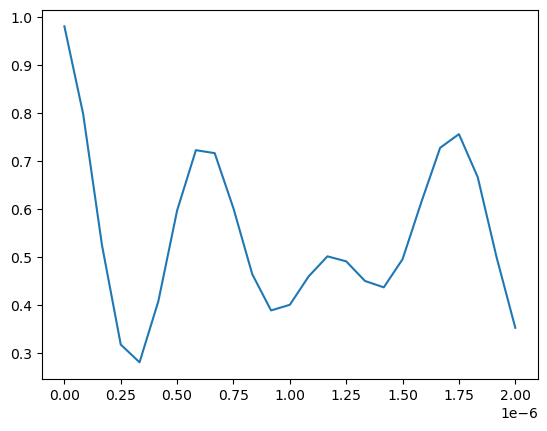

In [49]:
plt.plot(FreeEvolTimes, final_sigmaz_by_detuning[-1])

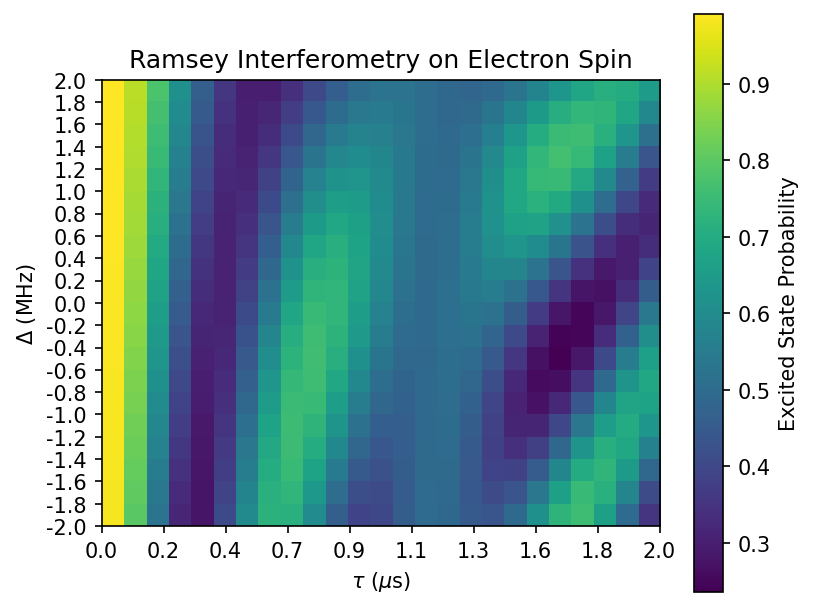

In [50]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=150)

cax = ax.imshow(final_sigmaz_by_detuning, cmap='viridis', interpolation='nearest', extent=(0, 50, -20, 20))

# Set custom x-axis labels
ax.set_xticks(np.linspace(0, 50, 10))
ax.set_xticklabels([f'{x * 2 / 50:.1f}' for x in np.linspace(0, 50, 10)])
ax.set_yticks(np.linspace(-20, 20, 21)) 
ax.set_yticklabels([f'{x * 2 / 20:.1f}' for x in np.linspace(-20, 20, 21)])

# Set labels and title
ax.set_xlabel('$\\tau$ ($\\mu$s)')
ax.set_ylabel('$\\Delta$ (MHz)')
ax.set_title('Ramsey Interferometry on Electron Spin')

# Add a colorbar
fig.colorbar(cax, ax=ax, label='Excited State Probability')
plt.savefig("ramsey_heatmap_original.png", dpi=300)
# Show the plot
plt.show()

In [56]:
# 7 carbons = 2085.2492463588715
# 6 carbons = 453.3997731208801
# 5 carbons = 87.23821449279785
# 4 carbons = 19.407397031784058
# 3 carbons = 5.374257564544678
# 2 carbons = 2.3353490829467773
# 1 carbon = 1.4858026504516602

In [60]:
cpu_runtimes = [1.4858026504516602, 2.3353490829467773, 5.374257564544678, 19.407397031784058, 87.23821449279785, 453.3997731208801, 2085.2492463588715]
carbon_nums = [i+1 for i in range(7)]

Text(0.5, 1.0, 'Ramsey Experiment CPU Benchmarking')

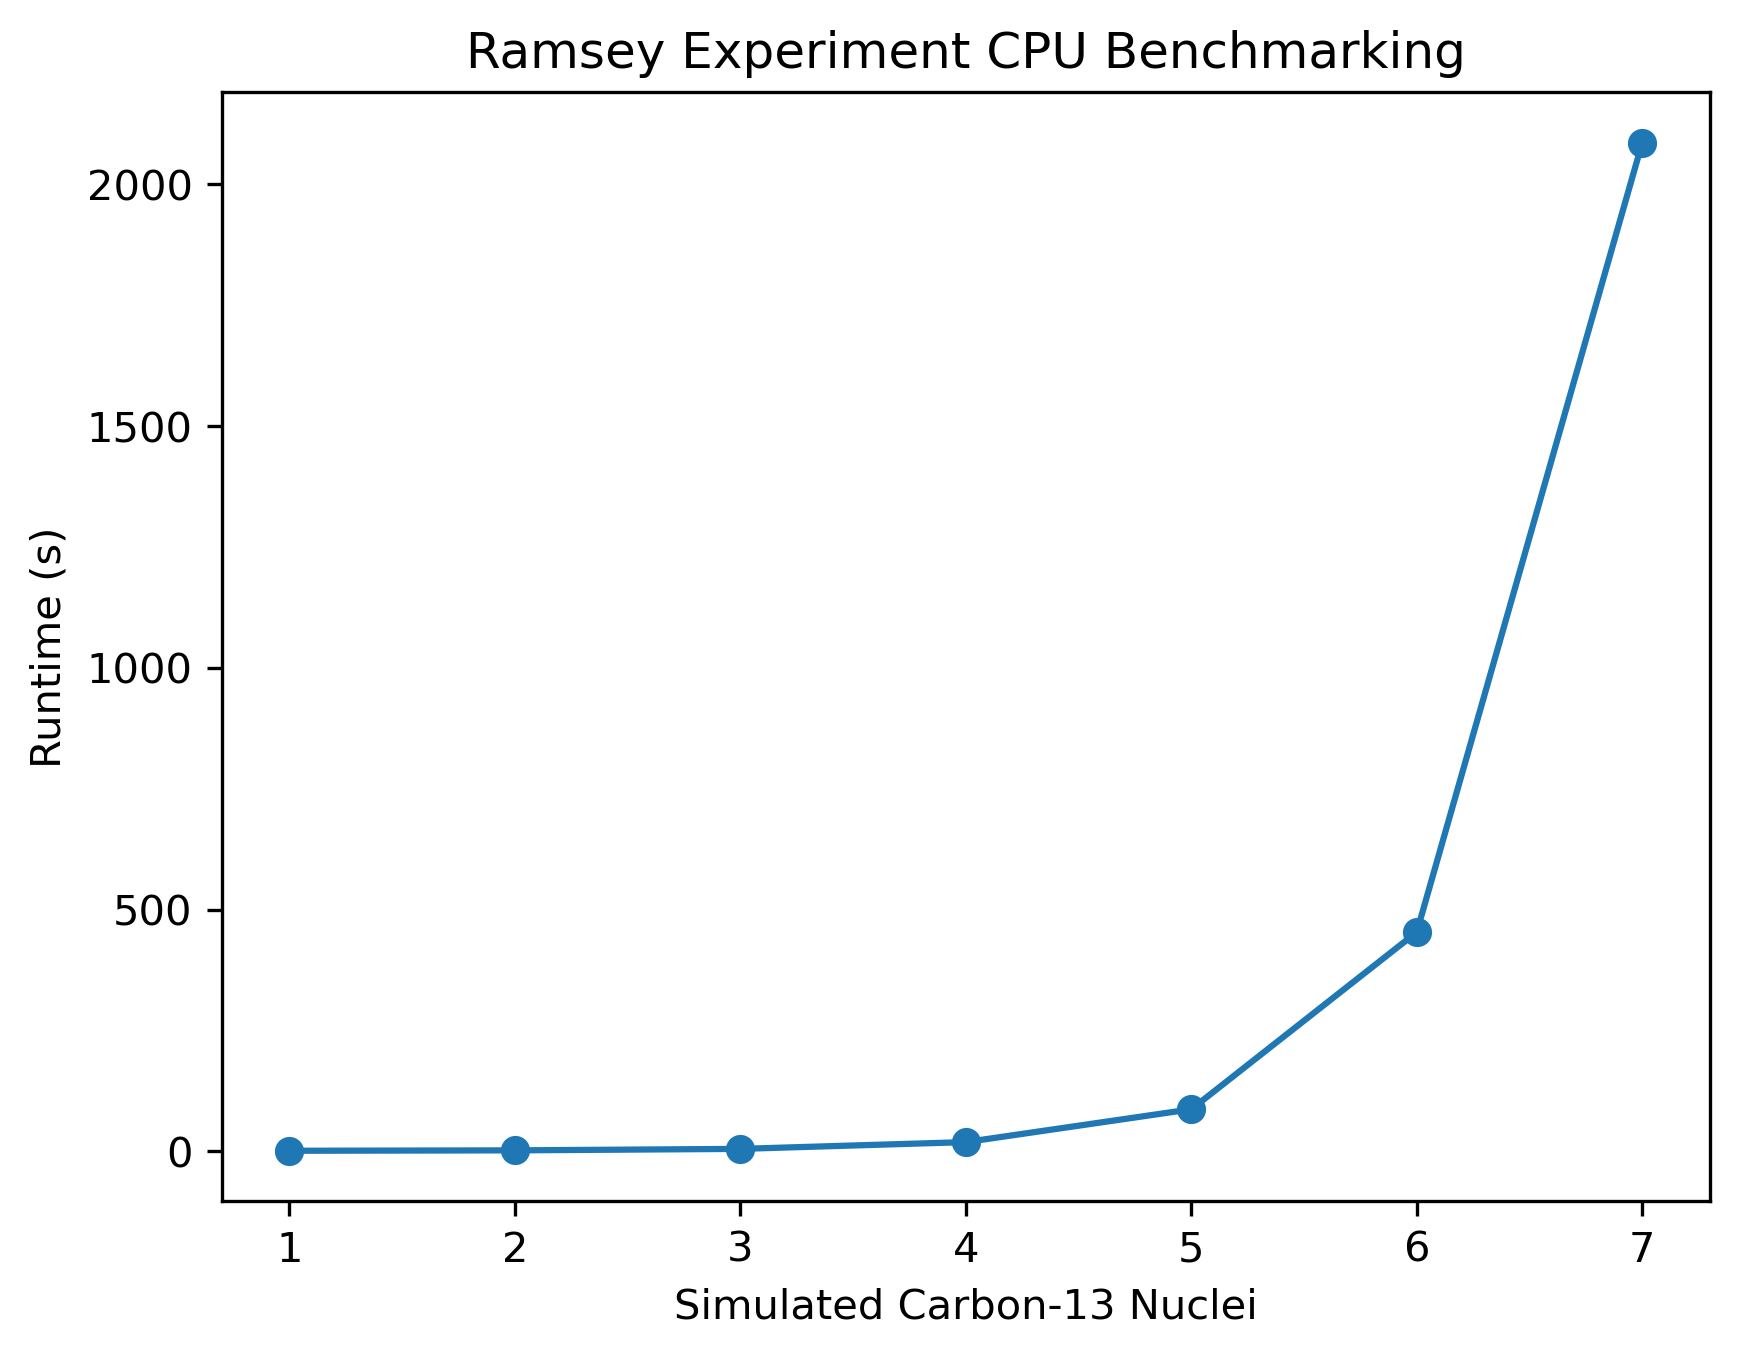

In [71]:
plt.figure(dpi=300)
plt.plot(carbon_nums, cpu_runtimes, '-o')
plt.xlabel("Simulated Carbon-13 Nuclei")
plt.ylabel("Runtime (s)")
plt.title("Ramsey Experiment CPU Benchmarking")
